In [3]:
import sys

import json

%pip install markdown2 pdfkit

import base64
import markdown2
import pdfkit

sys.version_info

sys.version_info(major=3, minor=9, micro=12, releaselevel='final', serial=0)

In [60]:
def load_file(path):
    '''
    objective:
        load json file
    input:
        path - path of json file
    output:
        data - dictionary of messages
    '''
    
    f = open(path)
    
    # returns JSON object as a dictionary
    data = json.load(f)
    
    # closing file
    f.close()
    
    return data
    
    
def add_to_markdown(markdown, line):
    '''
    objective:
        add another line to the markdown output
    input:
        markdown - compiled markdown to add to
        line - line to add to markdown
    output:
        markdown - compiled markdown with new line
    '''
        
    # add space
    markdown += '\n'
    # add line
    markdown += line
    
    return markdown
    

def create_markdown(data):
    '''
    objective:
        iterate through messages and format
    input:
        data - dictionary of messages
    output:
        markdown - compiled markdown of messages
    '''
    date = data['messages'][0]['created_date'][:-19]
    
    markdown = '###################################'

    markdown = add_to_markdown(markdown, date)
    
    for i in data['messages']:
        # check if new date
        if date != i['created_date'][:-19]:
            markdown = add_to_markdown(markdown, '###################################')
            date = i['created_date'][:-19]
            markdown = add_to_markdown(markdown, date)

        # try text
        try:
            # print name
            markdown = add_to_markdown(markdown, f"{i['creator']['name']}: {i['text']}")
        except:
            # print name
            markdown = add_to_markdown(markdown, f"{i['creator']['name']}:")

        # try attachment
        try:
            for attach in i['attached_files']:
                with open('Takeout/' + attach['export_name'][:47] + '.jpg', "rb") as img_file:
                    encoded_string = base64.b64encode(img_file.read()).decode('utf-8')
                markdown = add_to_markdown(markdown, f'<img src="data:image/png;base64,{encoded_string}" alt="Sample Image" />')
        except:
            pass

        # try reply
        try:
            markdown = add_to_markdown(markdown, f"  [IN REPLY TO]: \"{i['quoted_message_metadata']['text']}\" from {i['quoted_message_metadata']['creator']['name']}")

        except:
            pass

        # separate message
        finally:
            markdown = add_to_markdown(markdown, '')
            
    return markdown

def format_google_chat(path):
    
    # load the file
    data = load_file(path)
    
    # create the formatted message
    markdown_text = create_markdown(data)
    
    # convert to pdf
    #html_text = markdown2.markdown(markdown_text)
    #pdfkit.from_string(html_text, "output.pdf")
    
    return markdown
    

###################################
Tuesday, August 20, 2024
Jake Derry: this is a message

Jake Derry:

Jake Derry: this is actually a thread

Jake Derry: this is a thread
  [IN REPLY TO]: "" from Jake Derry

Jake Derry: another reply
  [IN REPLY TO]: "this is a thread" from Jake Derry

Jake Derry: Updated room membership.

Jake Derry: Updated room membership.

K Tokuda: Updated room membership.

K Tokuda: and a reply from someone new
  [IN REPLY TO]: "another reply" from Jake Derry

Dillon Wintz: Updated room membership.

Jake Derry: Updated room membership.

Dillon Wintz: Hello everyone

K Tokuda: and a reply to my own reply
  [IN REPLY TO]: "and a reply from someone new" from K Tokuda

Jake Derry: replying agin
  [IN REPLY TO]: "and a reply from someone new" from K Tokuda

Dillon Wintz: yet another reply
  [IN REPLY TO]: "and a reply from someone new" from K Tokuda

Jake Derry: create thread on a reply

Derrick Zhen: Updated room membership.

Dillon Wintz:

Dillon Wintz: 🤠

Dillon 
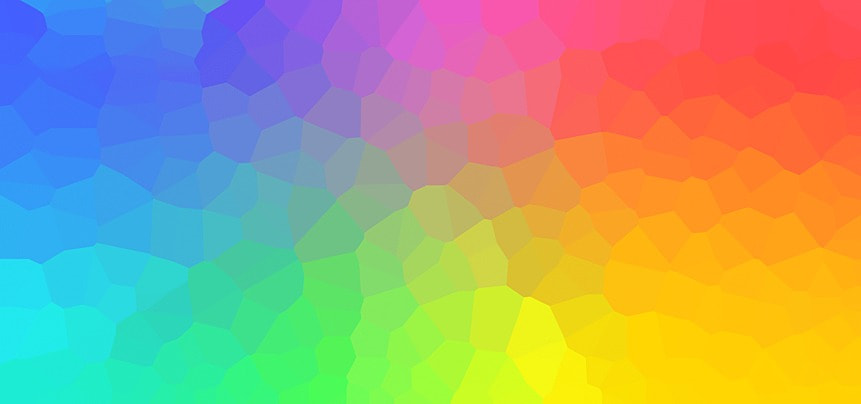

In [61]:
# run function
markdown = format_google_chat('Takeout/messages.json')
print(markdown)